In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
sns.set(style="ticks")
%matplotlib inline

## Step #1: Load and Explore Data

In [2]:
nyc_cab_df = pd.read_csv('nyc_car_hire_data.csv', low_memory=False)

In [3]:
nyc_cab_df.head()

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,...,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,...,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,...,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,...,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,...,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,...,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0


In [4]:
nyc_cab_df.shape

(1873671, 30)

In [5]:
nyc_cab_df.columns

Index([u'AWND', u'Base', u'Day', u'Dropoff_latitude', u'Dropoff_longitude',
       u'Ehail_fee', u'Extra', u'Fare_amount', u'Lpep_dropoff_datetime',
       u'MTA_tax', u'PRCP', u'Passenger_count', u'Payment_type',
       u'Pickup_latitude', u'Pickup_longitude', u'RateCodeID', u'SNOW',
       u'SNWD', u'Store_and_fwd_flag', u'TMAX', u'TMIN', u'Tip_amount',
       u'Tolls_amount', u'Total_amount', u'Trip_distance', u'Trip_type',
       u'Type', u'VendorID', u'lpep_pickup_datetime', u'Trip Length (min)'],
      dtype='object')

In [6]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=0)
fares = nyc_cab_sample['Fare_amount'].values
trip_lengths = nyc_cab_sample['Trip Length (min)'].values

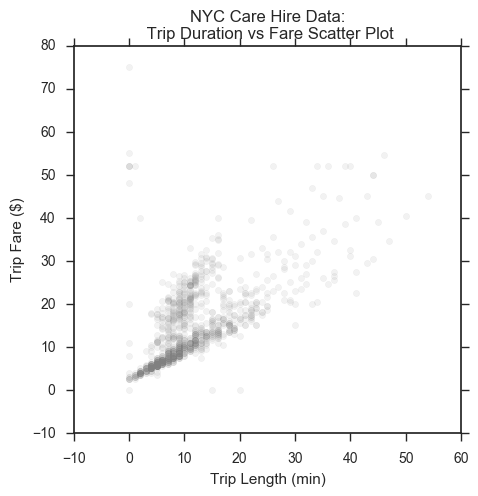

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(trip_lengths, fares, color='gray', alpha=0.1)

ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

plt.show()

---

## Step #2: Modeling the Data

In [8]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=0)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample['Trip Length (min)'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape((len(X), 1)), y, test_size=0.33, random_state=0)

In [9]:
regression = LinearRegression(fit_intercept=True)
regression.fit(X_train, y_train)

regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print 'The equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0])

The equation of the regression line is: 6.9764460844 + 0.712351660592 * x


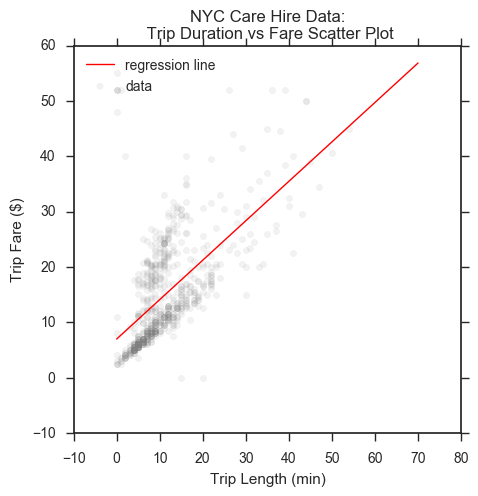

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x_vals = np.linspace(0, 70, 100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X_train, y_train, color='gray', alpha=0.1, label='data')


ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax.legend(loc='best')

plt.show()

---

## Step #3: Evaluate and Interpret the Model

### 1. Train vs Test Error

In [11]:
train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print 'The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE)

The train MSE is 58.3600234165, the test MSE is 46.1851093501


### 2. Uncertainty in the Model Parameter Estimates

In [12]:
def find_regression_params(regression_model, samples):
    nyc_cab_sample = nyc_cab_df.sample(n=samples)

    y = nyc_cab_sample['Fare_amount'].values
    X = nyc_cab_sample['Trip Length (min)'].values

    X_train, X_test, y_train, y_test = train_test_split(X.reshape((len(X), 1)), y, test_size=0.33, random_state=0)

    regression_model.fit(X_train, y_train)
    
    return regression_model.intercept_, regression_model.coef_[0]

In [13]:
regression_model = LinearRegression(fit_intercept=True)

total_draws = 500
samples = 1000
regression_params = []

for i in range(total_draws):
    if i % 10 == 0:
        out = i * 1. / total_draws * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
        
    regression_params.append(find_regression_params(regression_model, samples))
    
sys.stdout.write("\r%d%%" % 100)
regression_params = np.array(regression_params)

100%

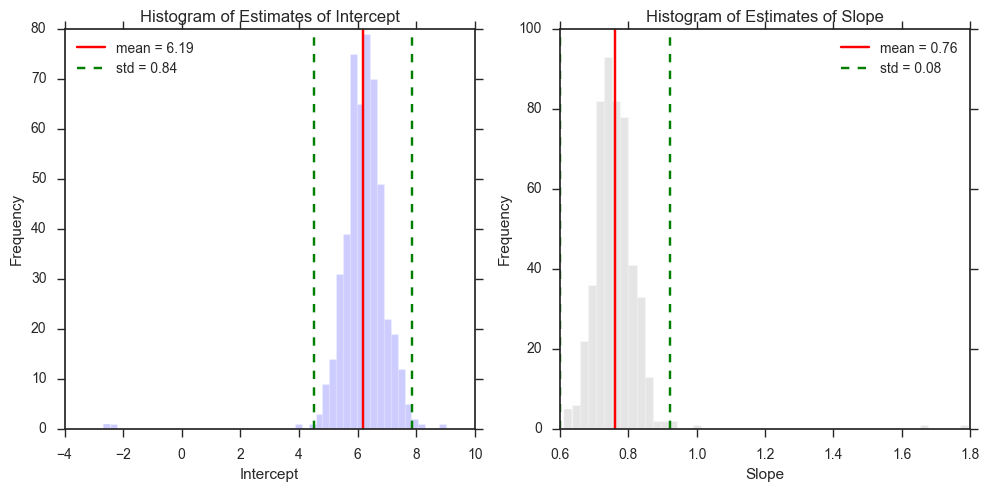

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(regression_params[:, 0], bins=50, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
ax[0].axvline(x=regression_params[:, 0].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 0].mean()))
ax[0].axvline(x=regression_params[:, 0].mean() - 2 * regression_params[:, 0].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 0].std()))
ax[0].axvline(x=regression_params[:, 0].mean() + 2 * regression_params[:, 0].std(), color='green', linestyle='--')

ax[0].set_xlabel('Intercept')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Estimates of Intercept')
ax[0].legend(loc='best')


ax[1].hist(regression_params[:, 1], bins=50, color='gray', edgecolor='white', linewidth=1, alpha=0.2)
ax[1].axvline(x=regression_params[:, 1].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 1].mean()))
ax[1].axvline(x=regression_params[:, 1].mean() - 2 * regression_params[:, 1].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 1].std()))
ax[1].axvline(x=regression_params[:, 1].mean() + 2 * regression_params[:, 1].std(), color='green', linestyle='--')

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Estimates of Slope')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

### 3. The Effect of Sample Size on Uncertainty

In [15]:
regression_model = LinearRegression(fit_intercept=True)

def compute_SE(total_draws, samples, regression_model):

    regression_params = []

    for i in range(total_draws):
        regression_params.append(find_regression_params(regression_model, samples))

    regression_params = np.array(regression_params)
    return np.std(regression_params[:, 0]), np.std(regression_params[:, 1])

total_draws = 100
samples = range(100, 10001, 900)
ses = []

for i in range(len(samples)):
    out = i * 1. / len(samples) * 100
    sys.stdout.write("\r%d%%" % out)
    sys.stdout.flush()
    ses.append(compute_SE(total_draws, samples[i], regression_model))

sys.stdout.write("\r%d%%" % 100)

100%

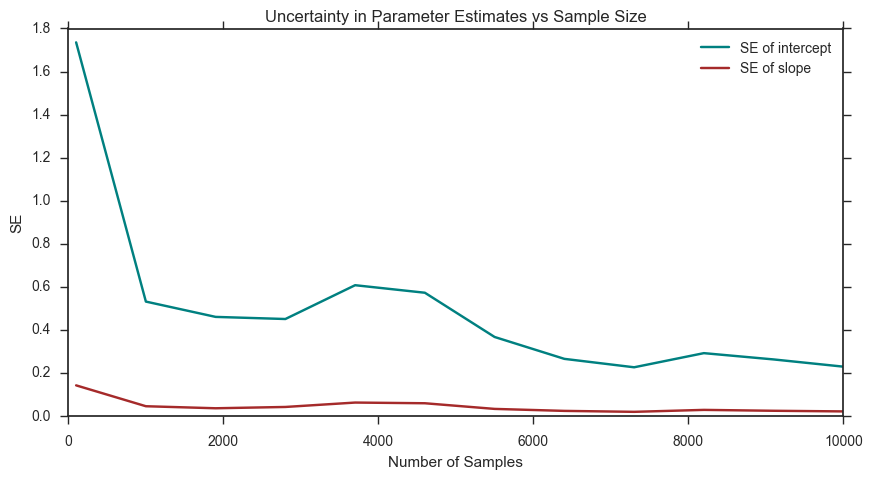

In [17]:
ses = np.array(ses)
    
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(samples, ses[:, 0], color='teal', label='SE of intercept')
ax.plot(samples, ses[:, 1], color='brown', label='SE of slope')

ax.set_xlabel('Number of Samples')
ax.set_ylabel('SE')
ax.set_title('Uncertainty in Parameter Estimates vs Sample Size')
ax.legend(loc='best')
plt.show()

---

## Step 2: Consider a Different Model for the Data

In [18]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=0)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample['Trip Length (min)'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape((len(X), 1)), y, test_size=0.33, random_state=0)

In [19]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

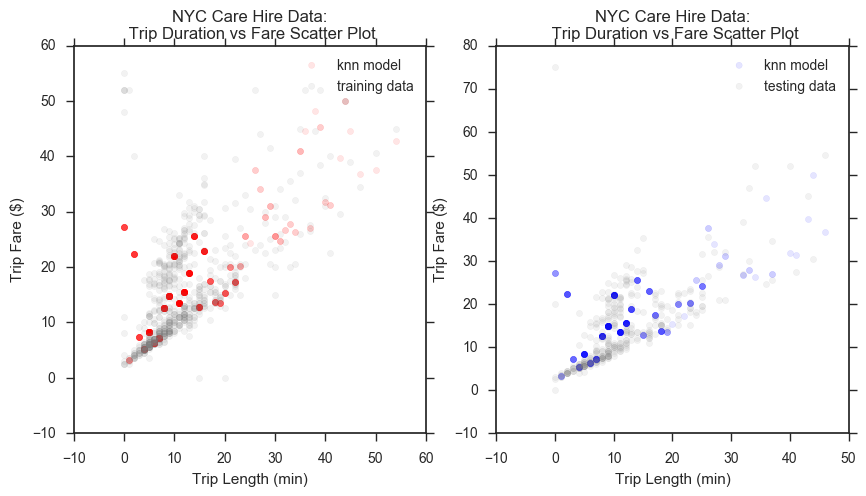

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_train, knn_model.predict(X_train), color='red', alpha=0.1, label='knn model')
ax[0].scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')


ax[0].set_xlabel('Trip Length (min)')
ax[0].set_ylabel('Trip Fare ($)')
ax[0].set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax[0].legend(loc='best')

ax[1].scatter(X_test, knn_model.predict(X_test), color='blue', alpha=0.1, label='knn model')
ax[1].scatter(X_test, y_test, color='gray', alpha=0.1, label='testing data')


ax[1].set_xlabel('Trip Length (min)')
ax[1].set_ylabel('Trip Fare ($)')
ax[1].set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax[1].legend(loc='best')

plt.show()

In [21]:
train_MSE= np.mean((y_train - knn_model.predict(X_train))**2)
test_MSE= np.mean((y_test - knn_model.predict(X_test))**2)

print 'The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE)

The train MSE is 61.5895961654, the test MSE is 63.4703257441


---

## Step #3: Evaluate and Interpret the kNN Model

In [22]:
train_MSEs = []
test_MSEs = []

for k in range(1, 100):
    sys.stdout.write("\r%d%%" % k)
    sys.stdout.flush()
    
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_MSEs.append(np.mean((y_train - knn_model.predict(X_train))**2))
    test_MSEs.append(np.mean((y_test - knn_model.predict(X_test))**2))
    
sys.stdout.write("\r%d%%" % 100)

100%

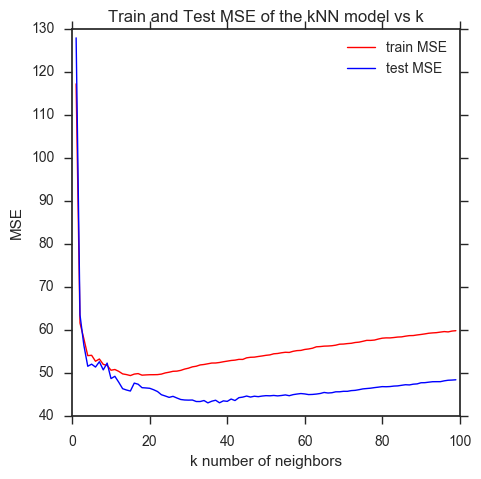

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(range(1, 100), train_MSEs, color='red', linewidth=1.0, label='train MSE')
ax.plot(range(1, 100), test_MSEs, color='blue', linewidth=1.0, label='test MSE')


ax.set_xlabel('k number of neighbors')
ax.set_ylabel('MSE')
ax.set_title('Train and Test MSE of the kNN model vs k')
ax.legend(loc='best')

plt.show()